In [20]:
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt
from scipy.stats import boxcox

In [21]:
df = pd.read_csv('upa_event_ts.csv')
df = df.sort_values(by=['datetime'])

In [22]:
df.head(2)

,datetime,code,day,hour,minute,day_name,datetime.1,count,date,month
0,1535414421259,combinedproducts-search-e-flightresults-filter...,27,20,0,Monday,1535414421259,1,2018-08-27 20:00:21.259,8
1,1535414451815,transfers-checkout-e-credit-card-completed,27,20,0,Monday,1535414451815,2,2018-08-27 20:00:51.815,8


In [23]:
def get_ts(code,df, apply_box_cox = False, lamb = 0.5):
    values = np.float32(df[df.code == code]['count'].values)
    dim = values.shape[0]
    index = np.int64(np.array([x for x in range(1,dim+1)]))
    index = index.reshape(1,dim)
    values = values.reshape(1,dim)
    if (apply_box_cox):
        values = boxcox(values, lamb)
    return (index, values)

In [24]:
def generate_timeseries_csv():
    codes = ['cars-search','cars-checkout','cars-thanks', 'hotels-search','hotels-checkout','hotels-thanks','flights-search','flights-checkout','flights-thanks']
    for code in codes:
        x_ts, y_ts = get_ts(code, df)
        t = pd.Series(data=y_ts.flat, index=x_ts.flat)
        t.to_csv(code + ".csv")

In [33]:
x_ts, y_ts = get_ts('flights-search',df, apply_box_cox=True, lamb=0.3)

In [34]:
LEARNING_RATE = 1.0
PERIOD = 1008
PI = np.pi
ALPHA_REG = 0.08

In [35]:
x = tf.constant(x_ts,dtype=tf.float32)

y = tf.constant(y_ts,dtype=tf.float32)

multipliers = tf.constant([(x*2*PI)/PERIOD for x in range(1,PERIOD)], dtype=tf.float32)

amplitudes_cos = tf.Variable(tf.random_uniform([1, PERIOD-1], -10, 10, seed=42))

amplitudes_sin = tf.Variable(tf.random_uniform([1, PERIOD-1], -10, 10, seed=42))

bias = tf.Variable(tf.zeros([1]))

sin_part = tf.reduce_sum(tf.sin(tf.transpose(x) * multipliers) * amplitudes_sin, 1)

cos_part = tf.reduce_sum(tf.cos(tf.transpose(x) * multipliers) * amplitudes_cos, 1)

y_pred = sin_part + cos_part + bias

error = y_pred - y

regularizer = ALPHA_REG * tf.nn.l2_loss(amplitudes_cos) + ALPHA_REG * tf.nn.l2_loss(amplitudes_sin)

mse = tf.reduce_mean(tf.square(error) + regularizer, name="mse")

op = tf.train.AdamOptimizer(learning_rate=LEARNING_RATE).minimize(mse)

In [36]:
n_epochs = 1000
init = tf.global_variables_initializer()
sess = tf.Session()
with tf.Session() as sess:
        sess.run(init)
        for epoch in range(n_epochs):
            sess.run(op)
            print("epoch %s, mse = %s " % (epoch, mse.eval()))
        y_p = y_pred.eval()

epoch 0, mse = 26644.467 
epoch 1, mse = 17832.2 
epoch 2, mse = 11991.933 
epoch 3, mse = 8386.684 
epoch 4, mse = 6362.3926 
epoch 5, mse = 5401.9395 
epoch 6, mse = 5095.856 
epoch 7, mse = 5124.544 
epoch 8, mse = 5260.398 
epoch 9, mse = 5367.16 
epoch 10, mse = 5379.4834 
epoch 11, mse = 5274.902 
epoch 12, mse = 5055.922 
epoch 13, mse = 4741.363 
epoch 14, mse = 4360.7905 
epoch 15, mse = 3947.6658 
epoch 16, mse = 3531.9104 
epoch 17, mse = 3135.6401 
epoch 18, mse = 2773.389 
epoch 19, mse = 2454.3757 
epoch 20, mse = 2183.4727 
epoch 21, mse = 1960.6201 
epoch 22, mse = 1780.6575 
epoch 23, mse = 1635.5276 
epoch 24, mse = 1517.3401 
epoch 25, mse = 1419.5242 
epoch 26, mse = 1336.3687 
epoch 27, mse = 1262.4006 
epoch 28, mse = 1192.2036 
epoch 29, mse = 1121.2126 
epoch 30, mse = 1046.9192 
epoch 31, mse = 969.44916 
epoch 32, mse = 890.9695 
epoch 33, mse = 814.11176 
epoch 34, mse = 740.68994 
epoch 35, mse = 671.6332 
epoch 36, mse = 607.53265 
epoch 37, mse = 548.9333 

epoch 303, mse = 7.086073 
epoch 304, mse = 7.0899124 
epoch 305, mse = 7.095108 
epoch 306, mse = 7.100476 
epoch 307, mse = 7.1042047 
epoch 308, mse = 7.104179 
epoch 309, mse = 7.0991235 
epoch 310, mse = 7.0904274 
epoch 311, mse = 7.0818753 
epoch 312, mse = 7.0769615 
epoch 313, mse = 7.0769587 
epoch 314, mse = 7.0805244 
epoch 315, mse = 7.0844913 
epoch 316, mse = 7.085803 
epoch 317, mse = 7.083366 
epoch 318, mse = 7.078735 
epoch 319, mse = 7.0752716 
epoch 320, mse = 7.075553 
epoch 321, mse = 7.079204 
epoch 322, mse = 7.0836987 
epoch 323, mse = 7.0871854 
epoch 324, mse = 7.090539 
epoch 325, mse = 7.0966973 
epoch 326, mse = 7.107094 
epoch 327, mse = 7.117634 
epoch 328, mse = 7.118894 
epoch 329, mse = 7.1051903 
epoch 330, mse = 7.085407 
epoch 331, mse = 7.0760336 
epoch 332, mse = 7.082039 
epoch 333, mse = 7.092735 
epoch 334, mse = 7.0945807 
epoch 335, mse = 7.0852804 
epoch 336, mse = 7.0758533 
epoch 337, mse = 7.0763974 
epoch 338, mse = 7.083867 
epoch 339

epoch 608, mse = 7.1107225 
epoch 609, mse = 7.120027 
epoch 610, mse = 7.1316547 
epoch 611, mse = 7.1433687 
epoch 612, mse = 7.152319 
epoch 613, mse = 7.1557574 
epoch 614, mse = 7.1528535 
epoch 615, mse = 7.145598 
epoch 616, mse = 7.1387568 
epoch 617, mse = 7.136932 
epoch 618, mse = 7.138085 
epoch 619, mse = 7.1340413 
epoch 620, mse = 7.1207404 
epoch 621, mse = 7.1042824 
epoch 622, mse = 7.095265 
epoch 623, mse = 7.09883 
epoch 624, mse = 7.1102552 
epoch 625, mse = 7.1190543 
epoch 626, mse = 7.117246 
epoch 627, mse = 7.105357 
epoch 628, mse = 7.091599 
epoch 629, mse = 7.084394 
epoch 630, mse = 7.0854554 
epoch 631, mse = 7.089978 
epoch 632, mse = 7.092052 
epoch 633, mse = 7.08954 
epoch 634, mse = 7.0848403 
epoch 635, mse = 7.081865 
epoch 636, mse = 7.082488 
epoch 637, mse = 7.0855637 
epoch 638, mse = 7.088568 
epoch 639, mse = 7.089783 
epoch 640, mse = 7.0891676 
epoch 641, mse = 7.0876775 
epoch 642, mse = 7.086097 
epoch 643, mse = 7.0845146 
epoch 644, ms

epoch 914, mse = 7.110828 
epoch 915, mse = 7.107561 
epoch 916, mse = 7.1069293 
epoch 917, mse = 7.108666 
epoch 918, mse = 7.1115055 
epoch 919, mse = 7.1139574 
epoch 920, mse = 7.1149793 
epoch 921, mse = 7.1142325 
epoch 922, mse = 7.111952 
epoch 923, mse = 7.108696 
epoch 924, mse = 7.105123 
epoch 925, mse = 7.1018357 
epoch 926, mse = 7.0992966 
epoch 927, mse = 7.0977445 
epoch 928, mse = 7.097189 
epoch 929, mse = 7.0974345 
epoch 930, mse = 7.098168 
epoch 931, mse = 7.0990534 
epoch 932, mse = 7.099832 
epoch 933, mse = 7.1004014 
epoch 934, mse = 7.1008472 
epoch 935, mse = 7.1014295 
epoch 936, mse = 7.1025476 
epoch 937, mse = 7.104693 
epoch 938, mse = 7.108404 
epoch 939, mse = 7.11417 
epoch 940, mse = 7.1221848 
epoch 941, mse = 7.1318197 
epoch 942, mse = 7.140897 
epoch 943, mse = 7.145413 
epoch 944, mse = 7.141182 
epoch 945, mse = 7.1277275 
epoch 946, mse = 7.1109056 
epoch 947, mse = 7.099593 
epoch 948, mse = 7.0987797 
epoch 949, mse = 7.1064963 
epoch 950

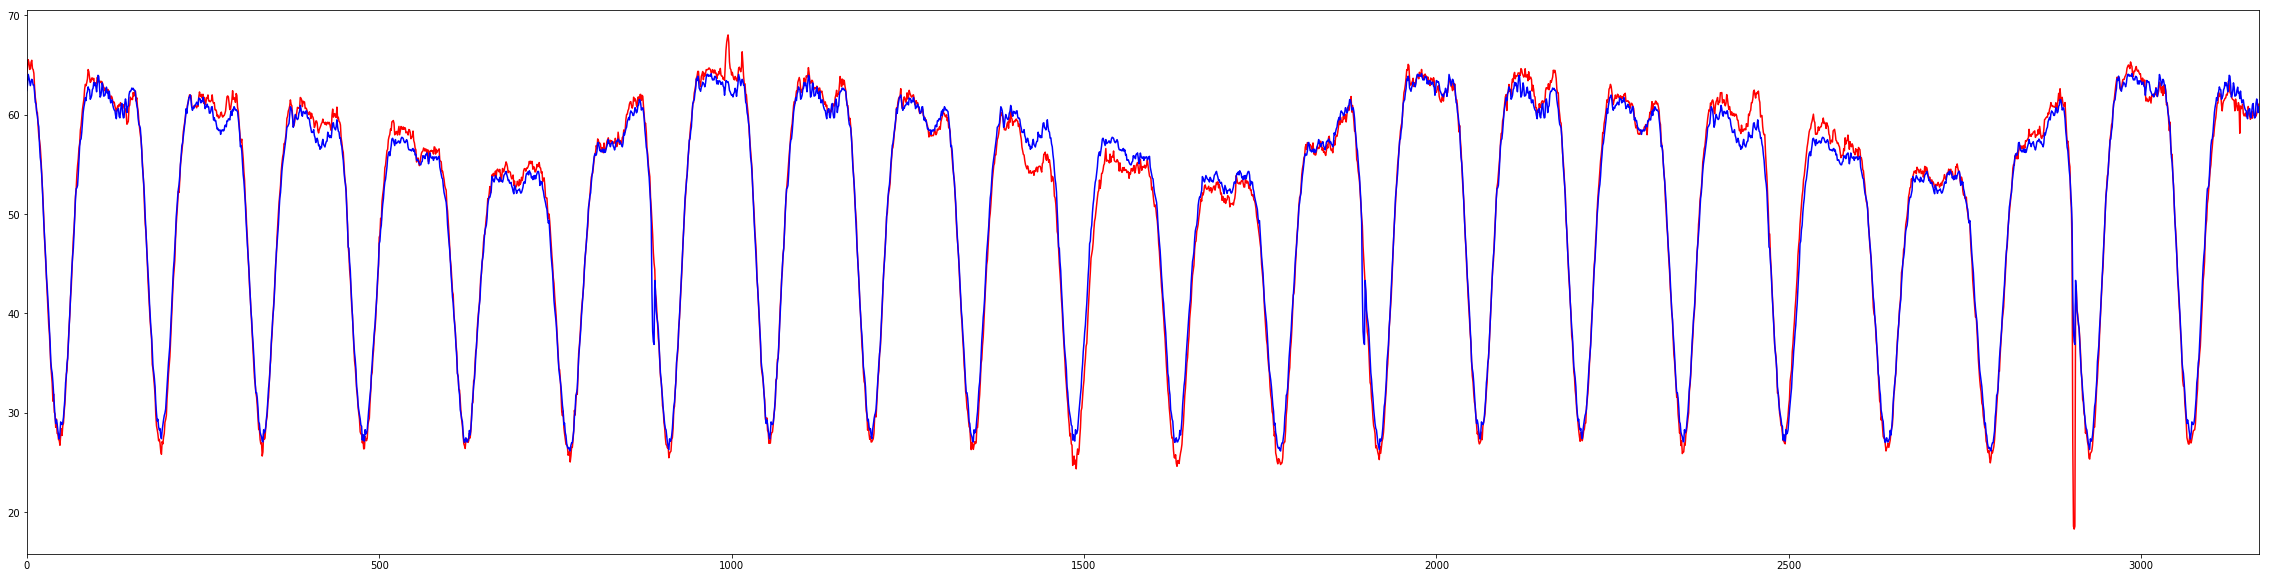

In [37]:
plt.figure(figsize=(40,10))
sbn.tsplot(y_ts, color="red")
sbn.tsplot(y_p, color="blue")

In [38]:
noise = y_ts - y_p

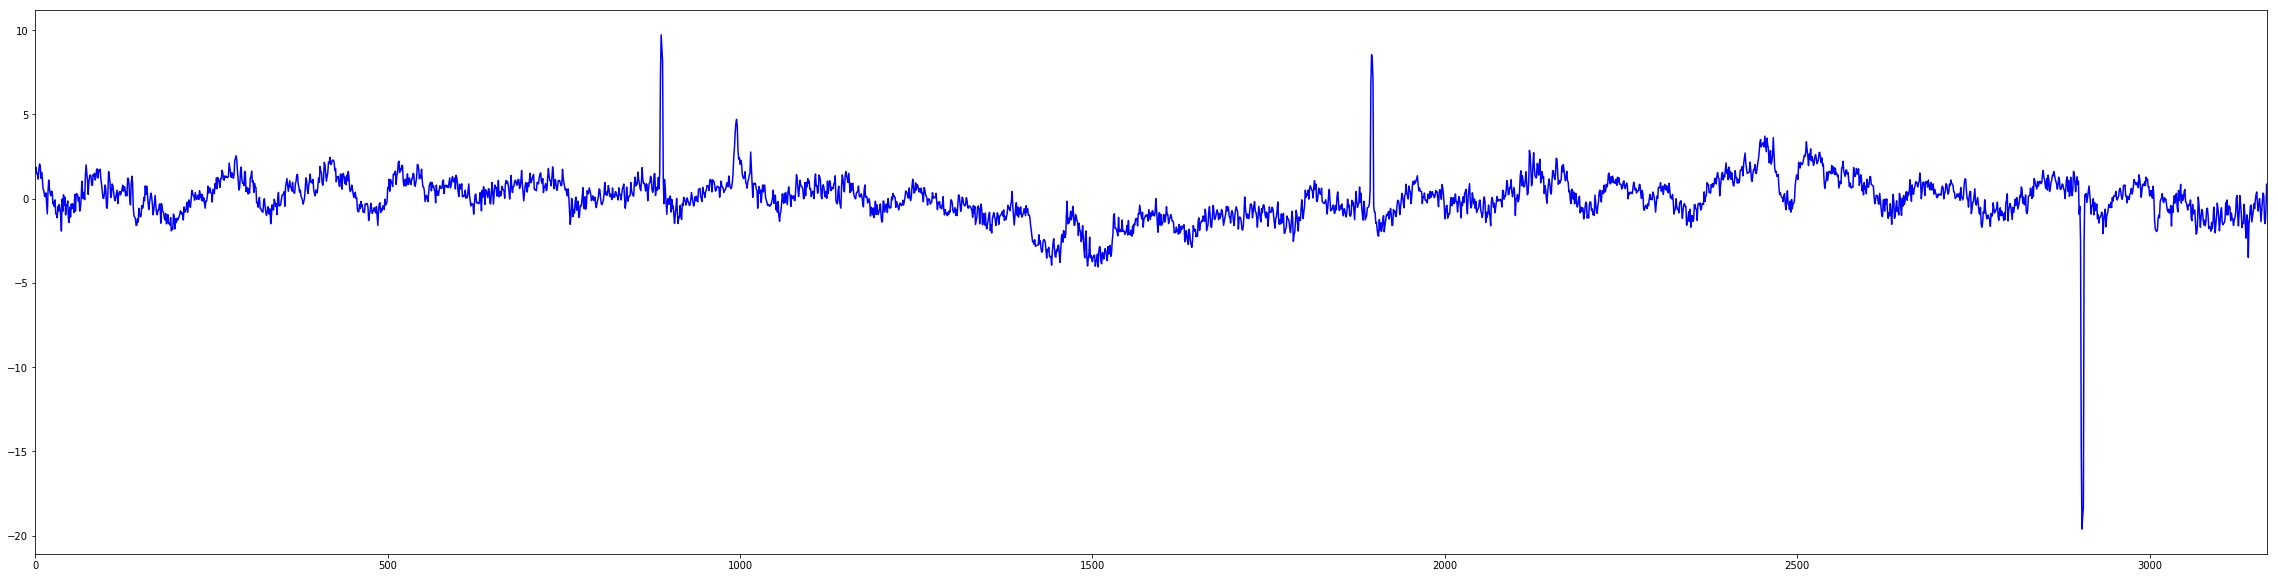

In [39]:
plt.figure(figsize=(40,10))
sbn.tsplot(noise, color="blue")

In [19]:
noise

<tf.Tensor 'sub_1:0' shape=(1, 3168) dtype=float32>